In [45]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from PIL import Image
from numpy import asarray
datagen = ImageDataGenerator(shear_range=0.2
                             , zoom_range=0.2
                             ,width_shift_range=0.2
                             ,height_shift_range=0.2
                            ,rotation_range=0.2
                            ,horizontal_flip=True
                            ,fill_mode='nearest') 

image = Image.open('4.png')
#img = load_img('Datasets\train\covid\3.png')  
x = asarray(image)
print(type(data))
# summarize shape
print(data.shape)
    # Reshape the input image 
x = x.reshape((1, ) + x.shape)  
i = 0

    # generate 5 new augmented images 
for batch in datagen.flow(x, batch_size = 1, 
                      save_to_dir ='Datasets/test/normal',  
                      save_prefix ='new', save_format ='png'):
        i += 1
        if i > 100: 
            break

<class 'numpy.ndarray'>
(582, 522, 4)


In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# useful for getting number of classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:
x = Dense(64, activation='relu')(x)
x= Dropout(0,5)(x)
x= Dense(2,activation='softmax')(x)

In [8]:
 #create a model object
model = Model(inputs=vgg.input, outputs=x)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 100,
                                            class_mode = 'categorical')

Found 301 images belonging to 2 classes.
Found 301 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
10/10 [==============================] - 345s 34s/step - loss: 4.1894 - accuracy: 0.5349 - val_loss: 0.7779 - val_accuracy: 0.4950
Epoch 2/5
10/10 [==============================] - 435s 44s/step - loss: 0.8008 - accuracy: 0.5050 - val_loss: 0.7194 - val_accuracy: 0.5050
Epoch 3/5
10/10 [==============================] - 314s 31s/step - loss: 0.7316 - accuracy: 0.4817 - val_loss: 0.7369 - val_accuracy: 0.5017
Epoch 4/5
 3/10 [========>.....................] - ETA: 2:22 - loss: 0.7051 - accuracy: 0.4688

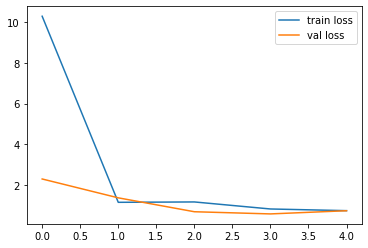

<Figure size 432x288 with 0 Axes>

In [15]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')